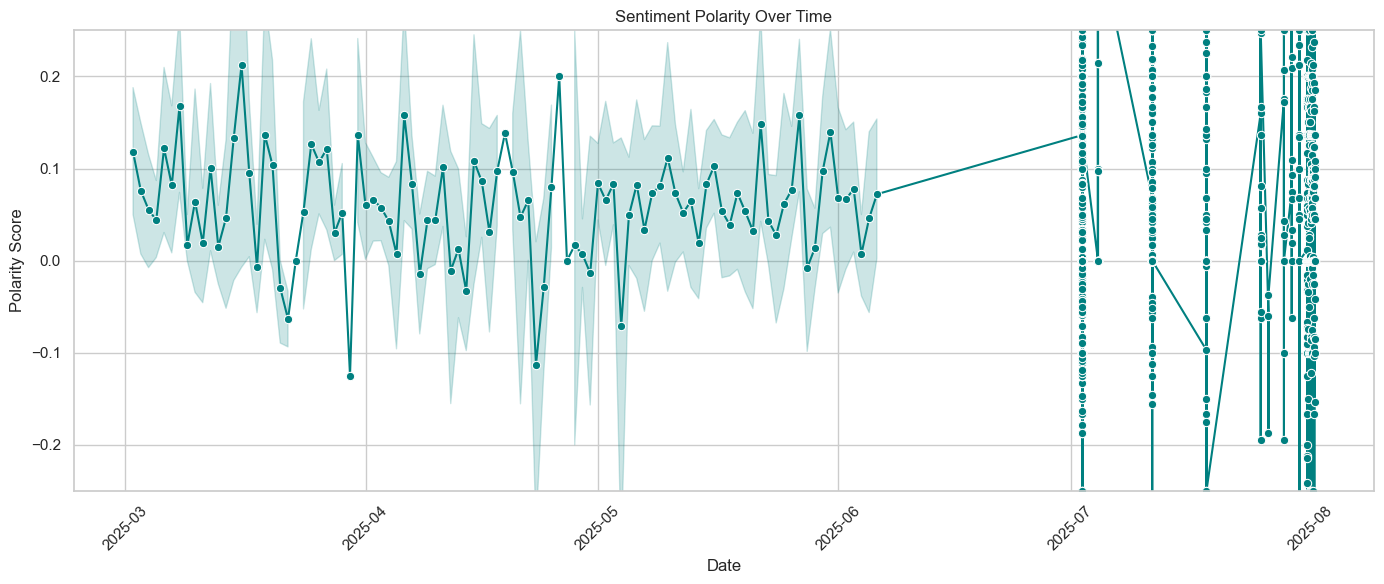

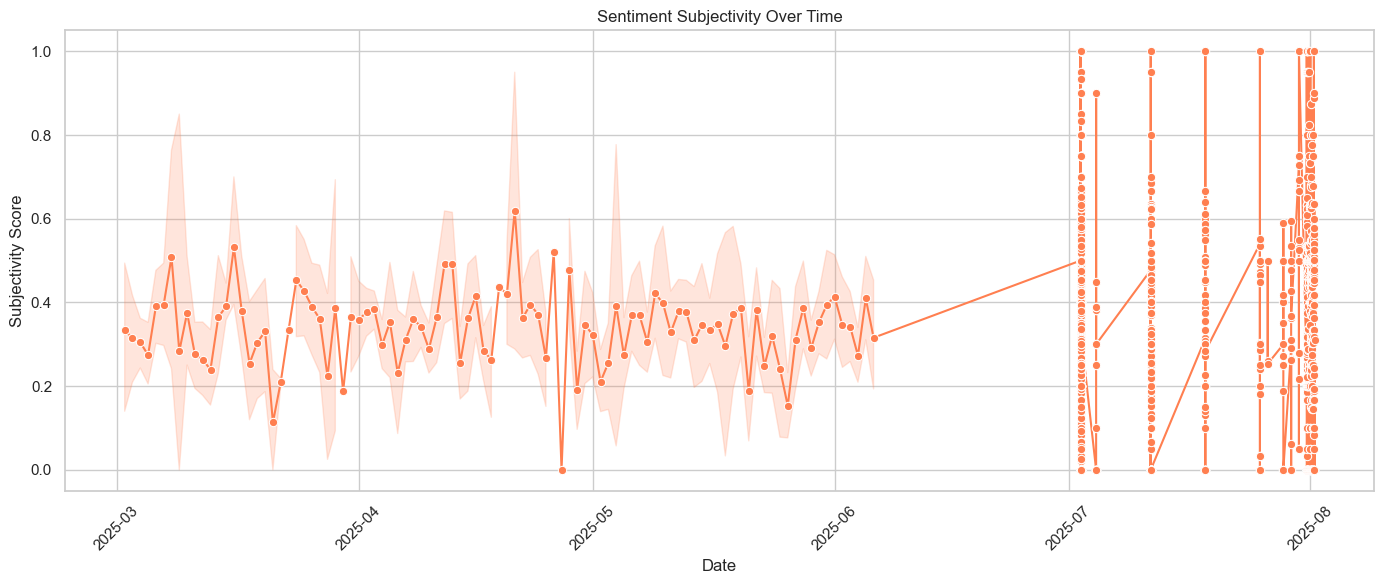

In [8]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the uploaded CSV file
file_path = "/Users/martinhe/Workspaces/python-nlp/SentimentAnalysis_Tariffs/news-results-aggregate.csv"
df = pd.read_csv(file_path)

# Define helper function to parse mixed date formats
def parse_date(date_str):
    date_str = str(date_str).strip().lower()
    
    # Match relative formats
    match = re.match(r"live\s*(\d+)\s*(minute|hour|day|week|month|year)s?\s*ago", date_str)
    if not match:
        match = re.match(r"(\d+)\s*(minute|hour|day|week|month|year)s?\s*ago", date_str)

    if match:
        value, unit = int(match.group(1)), match.group(2)

        # Convert unsupported units manually
        if unit == "month":
            return datetime.now() - timedelta(days=30 * value)
        elif unit == "year":
            return datetime.now() - timedelta(days=365 * value)
        else:
            delta_args = {unit + 's': value}
            return datetime.now() - timedelta(**delta_args)

    # Try parsing regular date strings
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except Exception:
        return None


# Convert date to datetime and sort
df["parsed_date"] = df["date"].apply(parse_date)
df = df.dropna(subset=["parsed_date"]).sort_values("parsed_date")

# Combine title and snippet for sentiment analysis
df["text"] = df["title"].fillna('') + " " + df["snippet"].fillna('')

# Apply sentiment analysis
df["polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Set up visualization style
sns.set(style="whitegrid")

# Plot: Change in polarity over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="parsed_date", y="polarity", marker="o", color="teal")
plt.title("Sentiment Polarity Over Time")
plt.xlabel("Date")
plt.ylabel("Polarity Score")

plt.ylim(-0.25, 0.25)  # Set y-axis limits for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot: Change in subjectivity over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="parsed_date", y="subjectivity", marker="o", color="coral")
plt.title("Sentiment Subjectivity Over Time")
plt.xlabel("Date")
plt.ylabel("Subjectivity Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
